In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('movie.csv')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [5]:
col_df=pd.DataFrame([df.columns])
col_df

,0,1,2,3,4,5,6,7,8
0,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url


In [6]:
col_df1 = pd.DataFrame(df.columns, columns=["column_names"])
col_df1

,column_names
0,Release_Date
1,Title
2,Overview
3,Popularity
4,Vote_Count
5,Vote_Average
6,Original_Language
7,Genre
8,Poster_Url


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


## Initial analysis
->looks like our data has no NaN values.
->Columns like Overview,Poster_Url,Original_langauge would not be useful in analysis 
->Release date columns need to be casted into a data-time format from where we can extract our year

In [8]:
## Exploring the Genres Columns
df['Genre'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9837 entries, 0 to 9836
Series name: Genre
Non-Null Count  Dtype 
--------------  ----- 
9826 non-null   object
dtypes: object(1)
memory usage: 77.0+ KB


In [9]:
genre_df=df['Genre'].to_frame(name='Genre')
genre_df.head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [10]:
# checking for any null values
df['Genre'].isnull().sum()


11

In [11]:
df['Genre'].notnull().sum()


9826

In [12]:
df['Genre'].shape

(9837,)

In [13]:
#check for duplicated rows
print("no of duplicates in given data ->",df.duplicated().sum())
print("no of duplicates in genre column ->",genre_df.duplicated().sum())

no of duplicates in given data -> 0
no of duplicates in genre column -> 7499


->Since number of duplicates in genre columns is higher,

It can help answer:

->Are there many repeated genre values?
->Is the dataset dominated by a few genres?
->Should you compress these into categories?

In [14]:
dom_gen=df['Genre'].value_counts().to_frame(name='dominatedGenre')
dom_gen.head()

,dominatedGenre
Genre,
Drama,466
Comedy,403
"Drama, Romance",248
Horror,238
"Horror, Thriller",199


In [15]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


# Exploration summary
we have a dataframe consisting of 9827 rows and 9 columns.

Dataset looks a bit tidy with no NaNs nor duplicated values.

Release_Date column needs to be casted into datetime and we need to extract only the year.

Overview, Original_Language and Poster-Url wouldn’t be so useful during analysis.

There are noticeable outliers in the Popularity column.

Vote_Average is better to be categorised for proper analysis.

Genre column has comma-separated values and white spaces that need to be handled.

# Data Cleaning




In [16]:
# Data Cleaning

df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [17]:
release_date_parsed = pd.to_datetime(
    df['Release_Date'],
    errors='coerce'   # invalid strings → NaT instead of crashing
)

print(release_date_parsed.dtype)


datetime64[ns]


In [18]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [19]:
release_year = release_date_parsed.dt.year


In [20]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [21]:
df['Release_Date_Clean'] = release_date_parsed
df['Release_Year'] = release_date_parsed.dt.year


In [22]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Date_Clean,Release_Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021-12-15,2021.0
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022-03-01,2022.0
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022-02-25,2022.0
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021-11-24,2021.0
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021-12-22,2021.0


In [23]:
# Step 1: Convert Release_Date safely to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Step 2: Drop rows where date conversion failed
df = df.dropna(subset=['Release_Date'])

# Step 3: Extract ONLY year (this is what your screenshot shows)
df['Release_Date'] = df['Release_Date'].dt.year


In [24]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Date_Clean,Release_Year
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021-12-15,2021.0
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022-03-01,2022.0
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022-02-25,2022.0
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021-11-24,2021.0
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021-12-22,2021.0


In [25]:
df = df.drop(columns=['Release_Date_Clean', 'Release_Year'])


In [26]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [27]:
# dropping Original and poster_url
df.drop(columns=['Overview', 'Poster_Url'], inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


In [28]:
def categorize_col(df, col, labels, new_col=None):
    """
    Categorize a numeric column based on quartiles (safe for re-runs)

    Args:
        df (pd.DataFrame): dataframe
        col (str): numeric column to categorize
        labels (list): category labels from low → high
        new_col (str, optional): name of new category column

    Returns:
        pd.DataFrame
    """
    # create default new column name
    if new_col is None:
        new_col = f"{col}_category"

    # ensure numeric (prevents notebook state bugs)
    df[col] = pd.to_numeric(df[col], errors="coerce")

    # compute quartile edges safely
    edges = df[col].quantile([0, 0.25, 0.5, 0.75, 1]).values

    # categorize
    df[new_col] = pd.cut(
        df[col],
        bins=edges,
        labels=labels,
        include_lowest=True,
        duplicates="drop"
    )

    return df


In [29]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,en,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",average
...,...,...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896,7.6,en,"Drama, Crime",popular
9833,2020,Violent Delights,13.356,8,3.5,es,Horror,not_popular
9834,2016,The Offering,13.355,94,5.0,en,"Mystery, Thriller, Horror",not_popular
9835,2021,The United States vs. Billie Holiday,13.354,152,6.7,en,"Music, Drama, History",average


In [30]:
df['Vote_Average_category'].value_counts()

Vote_Average_category
not_popular    2567
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [31]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Original_Language        0
Genre                    0
Vote_Average_category    0
dtype: int64

In [32]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,en,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",average


In [33]:
df = df.drop(columns=['Vote_Average'])
df.head()


,Release_Date,Title,Popularity,Vote_Count,Original_Language,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,en,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,en,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,en,Thriller,below_avg
3,2021,Encanto,2402.201,5076,en,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,en,"Action, Adventure, Thriller, War",average


now we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [34]:
#split the strings into lists

df['Genre']=df['Genre'].str.split(', ')

#explode the list
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Original_Language,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,en,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,en,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,en,Science Fiction,popular
3,2022,The Batman,3827.658,1151,en,Crime,popular
4,2022,The Batman,3827.658,1151,en,Mystery,popular


In [35]:
df['Genre']=df['Genre'].astype('category')

#confirming changes
df['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [36]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release_Date           25792 non-null  int32   
 1   Title                  25792 non-null  object  
 2   Popularity             25792 non-null  float64 
 3   Vote_Count             25792 non-null  object  
 4   Original_Language      25792 non-null  object  
 5   Genre                  25792 non-null  category
 6   Vote_Average_category  25792 non-null  category
dtypes: category(2), float64(1), int32(1), object(3)
memory usage: 958.1+ KB


In [37]:
df.nunique()

Release_Date              102
Title                    9512
Popularity               8159
Vote_Count               3266
Original_Language          43
Genre                      19
Vote_Average_category       4
dtype: int64

# Visualization

here we would use matplotlib and seaborn for making informative visuals to gain insights about out data

In [38]:
#setting up seaborn configurations
sns.set_style('whitegrid')

## What's the most frequest Genre in the dataset

In [39]:
# showing stats on genre column
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


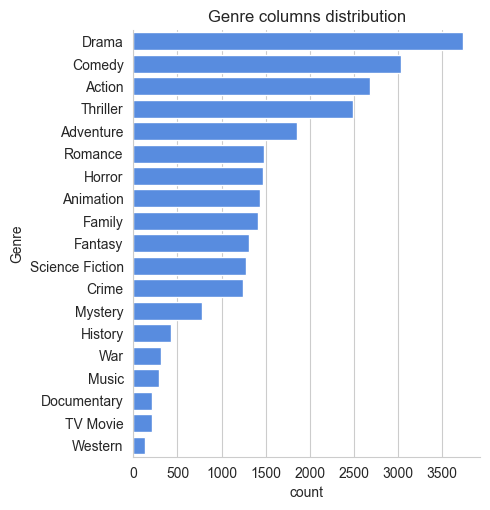

In [40]:
#visaulizing the genre column
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='#4287f5')
plt.title('Genre columns distribution')
plt.show()

we can notice from the above visal that Drama genre is the most frequent genre in our data set and has appeared more than 14% of the time among 19 other genres.

## What Genres has the highest votes?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


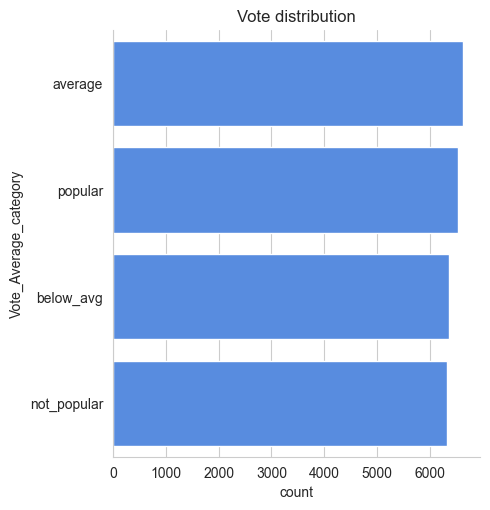

In [42]:
#visualizing vote average column
sns.catplot(y='Vote_Average_category',data=df,kind='count',order=df['Vote_Average_category'].value_counts().index,color='#4287f5')
plt.title('Vote distribution')
plt.show()

## What Movie got the highest popularity?What's its Genre?

In [43]:
#checking max popularity in dataset
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Original_Language,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,en,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,en,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,en,Science Fiction,popular


## What movie got the lowest Popularity?Whats its Genre?

In [44]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Original_Language,Genre,Vote_Average_category
25786,2021,The United States vs. Billie Holiday,13.354,152,en,Music,average
25787,2021,The United States vs. Billie Holiday,13.354,152,en,Drama,average
25788,2021,The United States vs. Billie Holiday,13.354,152,en,History,average
25789,1984,Threads,13.354,186,en,War,popular
25790,1984,Threads,13.354,186,en,Drama,popular
25791,1984,Threads,13.354,186,en,Science Fiction,popular


## Which year has the most filmed movies?

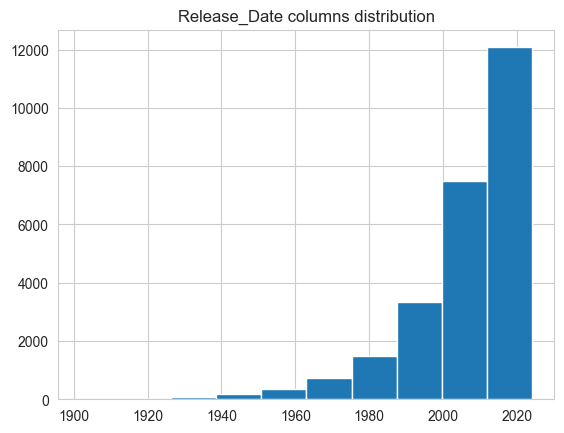

In [45]:
df['Release_Date'].hist()
plt.title('Release_Date columns distribution')
plt.show()

### Short report over this
